<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/ANN_Cancer_(Lab_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Dataset for classification
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer.data.shape

(569, 30)

In [4]:
# Loading data into pandas dataframe
data = pd.DataFrame(cancer.data, columns = cancer.feature_names) # continuous data
data.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [5]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
# To add target into dataframe
data['Target'] = cancer.target

In [7]:
X = data.drop("Target", axis = 1)
Y = data["Target"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (455, 30)
y_train shape (455,)
X_test shape (114, 30)
y_test shape (114,)


In [10]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model with initializer and regularizer 
 
Kernel Regularization is the process of adding penalty factors to the network layers to alter the weight propagation through the layers which facilitate the model to converge optimally.
 
Kernel initializers are used to statistically initialise the weights in the model. This will generate the weights and distribute them, it can be used as the starting weights.
 
Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [9]:
# building a linear stack of layers with the sequential model

L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 30, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01))) # input_dim based on number of feature variables
model.add(Dense(L2, activation = 'relu'))
model.add(Dropout(rate = 0.2))

# Output layer
model.add(Dense(1, activation = 'sigmoid')) # output is binary variable (0 / 1) (prefer sigmoid), unless multi-class target variables which is dependent on the final number (prefer softmax)
# put 1 when target variable is binary or continuous 

In [11]:
# compiling the sequential model
model.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = "adam")

In [12]:
# training the model for 10 epochs
history = model.fit(X_train, y_train, epochs = 10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 3s 64ms/step - loss: 2.4769 - accuracy: 0.8505 - val_loss: 2.3025 - val_accuracy: 0.9123
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 2.2411 - accuracy: 0.9275 - val_loss: 2.1959 - val_accuracy: 0.9211
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 2.1277 - accuracy: 0.9495 - val_loss: 2.1323 - val_accuracy: 0.9211
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 2.0562 - accuracy: 0.9451 - val_loss: 2.0687 - val_accuracy: 0.9298
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 1.9892 - accuracy: 0.9495 - val_loss: 2.0051 - val_accuracy: 0.9298
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 1.9241 - accuracy: 0.9604 - val_loss: 1.9379 - val_accuracy: 0.9298
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 1.8644 - accuracy: 0.9670 - val_loss: 1.8742 - val_accuracy: 0.9211
Epoch 8/10
5/5 [===========

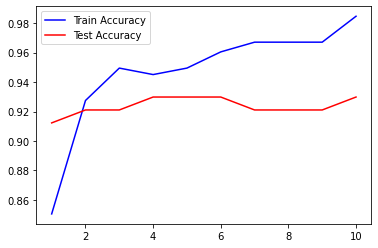

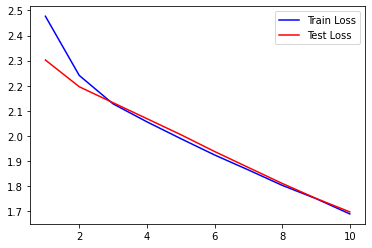

In [13]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()

# Early Stopping

Form of regularization used to avoid overfitting during training. Stop the training once the model performane stop improving.

In [15]:
early_stopping_monitor = EarlyStopping(patience = 6) # need to run 6 times where the model generates similar patterns until it stops
history = model.fit(X_train, y_train, epochs = 30, batch_size = 100, validation_data = (X_test, y_test), callbacks = [early_stopping_monitor])

Epoch 1/30
5/5 [==============================] - 0s 41ms/step - loss: 1.6404 - accuracy: 0.9824 - val_loss: 1.6460 - val_accuracy: 0.9386
Epoch 2/30
5/5 [==============================] - 0s 24ms/step - loss: 1.5931 - accuracy: 0.9824 - val_loss: 1.5988 - val_accuracy: 0.9386
Epoch 3/30
5/5 [==============================] - 0s 22ms/step - loss: 1.5495 - accuracy: 0.9846 - val_loss: 1.5529 - val_accuracy: 0.9386
Epoch 4/30
5/5 [==============================] - 0s 21ms/step - loss: 1.4966 - accuracy: 0.9890 - val_loss: 1.5082 - val_accuracy: 0.9474
Epoch 5/30
5/5 [==============================] - 0s 25ms/step - loss: 1.4531 - accuracy: 0.9890 - val_loss: 1.4643 - val_accuracy: 0.9474
Epoch 6/30
5/5 [==============================] - 0s 19ms/step - loss: 1.4118 - accuracy: 0.9846 - val_loss: 1.4204 - val_accuracy: 0.9386
Epoch 7/30
5/5 [==============================] - 0s 22ms/step - loss: 1.3713 - accuracy: 0.9868 - val_loss: 1.3771 - val_accuracy: 0.9386
Epoch 8/30
5/5 [===========

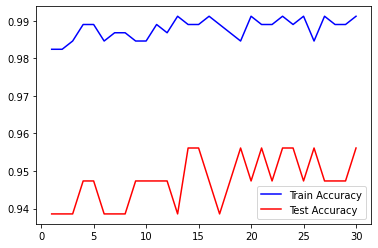

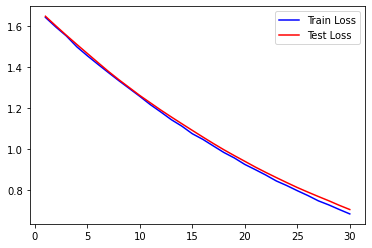

In [16]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()